<a href="https://colab.research.google.com/github/Rajan1735/SVM_Diabetes/blob/main/svm_for_multiple_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  768
No of col =  9


In [ ]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [ ]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [ ]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [ ]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    #print(data.loc[:,col].median())

In [ ]:
# print(col)
# data.loc[:,col].median()

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [ ]:
print(len(data[data['Outcome'] == 1]))
print(len(data[data['Outcome'] == 0]))

268
500


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data1 = data.iloc[: ,:-1]

In [ ]:
data1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


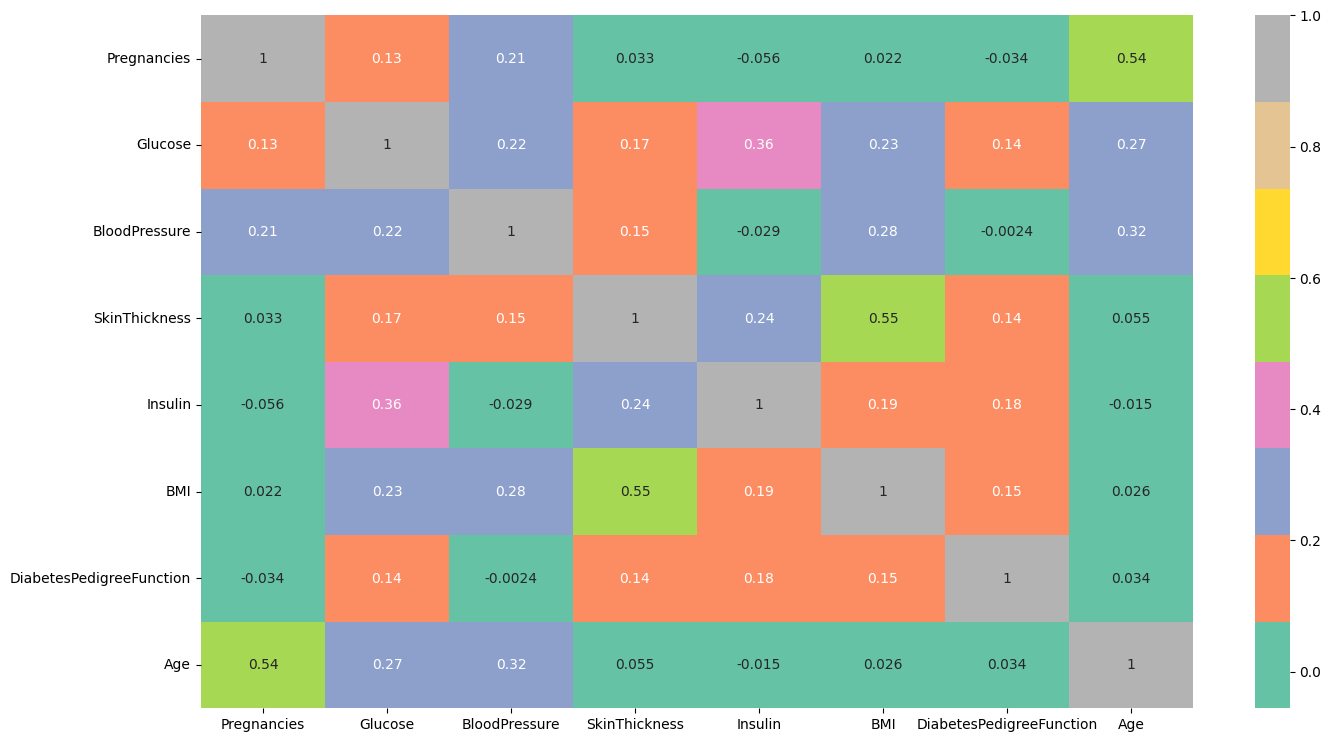

In [ ]:
plt.figure(figsize=(16,9))
corr = data1.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [ ]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [ ]:
# def roc_curve(Y_test, Y_score):
#     from sklearn.metrics import roc_curve, auc
#     fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
#     score = metrics.auc(fpr, tpr)

#     fig = px.area(
#         #fpr = False Positive Rate; tpr= True Positive Rate
#         x=fpr, y=tpr,
#         title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#         labels=dict(x='False Positive Rate', y='True Positive Rate'),
#         width=700, height=500
#     )

#     fig.add_shape(
#         type='line', line=dict(dash='dash'),
#         x0=0, x1=1, y0=0, y1=1
#     )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135.0,26.0,0.647,51
101,1,151,60,23,30.5,26.1,0.179,22
581,6,109,60,27,30.5,25.0,0.206,27
352,3,61,82,28,30.5,34.4,0.243,46
726,1,116,78,29,180.0,36.1,0.496,25
...,...,...,...,...,...,...,...,...
563,6,99,60,19,54.0,26.9,0.497,32
318,3,115,66,39,140.0,38.1,0.150,28
154,8,188,78,23,30.5,47.9,0.137,43
684,5,136,82,23,30.5,32.0,0.640,69


In [ ]:
Y_pred = svc.predict(X_test)
Y_pred



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
pd.DataFrame({'Results':list(Y_pred)})

,Results
0,0
1,0
2,0
3,0
4,0
...,...
149,0
150,0
151,1
152,0


In [ ]:
svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
svc_accuracy

79.22

In [ ]:
d = X_test.iloc[0:1]
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135.0,26.0,0.647,51


In [ ]:
Y_test.iloc[0:1]

,Outcome
285,0


In [ ]:
Y_pred = svc.predict(X_test.iloc[0:1])
Y_pred

array([0])

In [ ]:
Pregnancies = float(input("Enter Pregnancies = "))
Glucose = float(input("Enter Glucose = "))
BloodPressure = float(input("Enter BloodPressure = "))
SkinThickness = float(input("Enter SkinThickness = "))
Insulin = float(input("Enter Insulin = "))
BMI = float(input("Enter BMI = "))
DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction = "))
Age = float(input("Enter Age = "))

new_data = {'Pregnancies':[Pregnancies],
            'Glucose':[Glucose],
            'BloodPressure':[BloodPressure],
            'SkinThickness':[SkinThickness],
            'Insulin':[Insulin],
            'BMI':[BMI],
            'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
            'Age':[Age]}
d = pd.DataFrame(new_data)

KeyboardInterrupt: Interrupted by user

In [ ]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.0,30.0,50.0,0.4,34.0,34.0,0.45,34.0


In [ ]:
Y_score = svc.predict(d)
print(Y_score)

[0]


In [ ]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    # print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [ ]:
impressions(svc,svc_accuracy)

Accuracy: 79.22 %


ValueError: Found input variables with inconsistent numbers of samples: [154, 1]

In [ ]:
Y_test

,Outcome
285,0
101,0
581,0
352,0
726,0
...,...
563,0
318,0
154,1
684,0


In [ ]:
print(len(Y_test[Y_test['Outcome'] == True]))
print(len(Y_test[Y_test['Outcome'] == False]))

55
99
